In [1]:
# Loading libraries
import pandas as pd
import numpy as np

In [2]:
# Uploading the file
from google.colab import files
uploaded = files.upload()

Saving Superstore_Sales_Records.xls to Superstore_Sales_Records.xls


In [3]:
# Loading into a data frame
sales = pd.read_excel("Superstore_Sales_Records.xls")
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


EDA

In [4]:
# Data size
print(f"Total number of rows : {sales.shape[0]}")
print(f"Total number of columns : {sales.shape[1]}")

Total number of rows : 9994
Total number of columns : 21


In [5]:
# Analyzing data types of columns
sales.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [6]:
# Select the relevant columns
sales = sales[['Order Date', 'Category', 'Sales']]
sales.head()

,Order Date,Category,Sales
0,2016-11-08,Furniture,261.9600
1,2016-11-08,Furniture,731.9400
2,2016-06-12,Office Supplies,14.6200
3,2015-10-11,Furniture,957.5775
4,2015-10-11,Office Supplies,22.3680


In [7]:
# Viewing sales description
sales.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Order Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101


In [8]:
# Identifying null values
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Category    9994 non-null   object        
 2   Sales       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 234.4+ KB


In [9]:
# Check for distinct values
sales.nunique()

,0
Order Date,1237
Category,3
Sales,6144


In [10]:
# Display the categories and their frequencies
sales['Category'].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


In [11]:
# Set Order Date as Index
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales.set_index('Order Date', inplace=True)
sales.head()

,Category,Sales
Order Date,,
2016-11-08,Furniture,261.9600
2016-11-08,Furniture,731.9400
2016-06-12,Office Supplies,14.6200
2015-10-11,Furniture,957.5775
2015-10-11,Office Supplies,22.3680


In [12]:
# Calculating total time span
max_date = sales.index.max()
min_date = sales.index.min()
print(f"Maximum order date is {max_date}")
print(f"Minimum order date is {min_date}")
print(f"Total time span is around {(max_date.year - min_date.year)} years")

Maximum order date is 2017-12-30 00:00:00
Minimum order date is 2014-01-03 00:00:00
Total time span is around 3 years


Time Resampling

In [13]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Uploading the file
from google.colab import files
uploaded = files.upload()

Saving Superstore_Sales_Records.xls to Superstore_Sales_Records (1).xls


In [15]:
# Loading into a data frame
sales = pd.read_excel("Superstore_Sales_Records.xls")
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [16]:
# Filter out for furniture category
sales_sample = sales[sales['Category']=='Furniture']
sales_sample.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [18]:
# Group by dates
sales_sample = sales_sample.reset_index().groupby(by=['Order Date']).agg({'Sales':sum})
sales_sample.sort_index(inplace=True)
sales_sample.head()

<ipython-input-18-3227951071>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sales_sample = sales_sample.reset_index().groupby(by=['Order Date']).agg({'Sales':sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [19]:
# Resampling to make mothly start level
sales_sample_monthly = sales_sample.resample(rule = 'MS').mean()
sales_sample_monthly.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


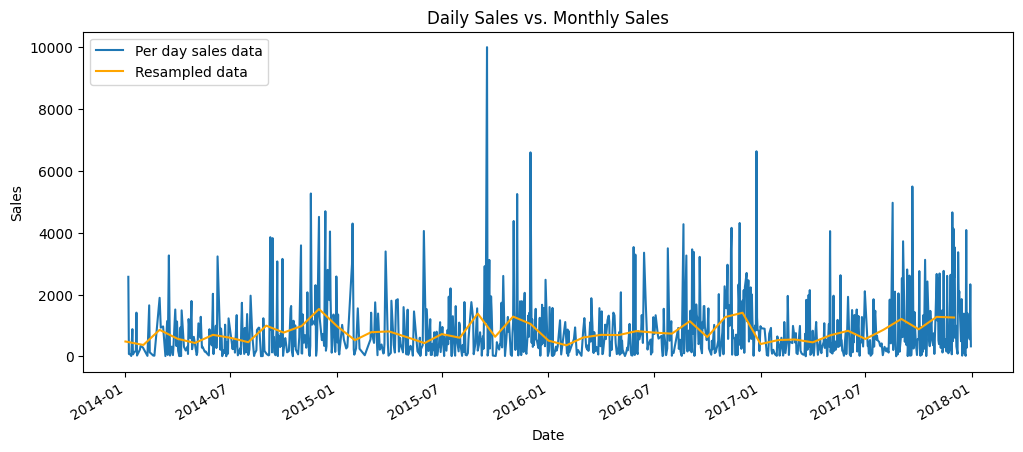

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))
# Plot the raw data
sales_sample['Sales'].plot(ax=ax, label='Per day sales data')
# Plot the resampled data
sales_sample_monthly['Sales'].plot(ax=ax, label='Resampled data', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Daily Sales vs. Monthly Sales')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

In [21]:
# Resampling
def first_day(entry):
  if(len(entry)):
    return entry[0]
sales_sample.resample(rule = 'A').apply(first_day)

<ipython-input-21-803010615>:5: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  sales_sample.resample(rule = 'A').apply(first_day)
<ipython-input-21-803010615>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return entry[0]


,Sales
Order Date,
2014-12-31,2573.82
2015-12-31,452.45
2016-12-31,173.94
2017-12-31,975.49


Time Upsampling

In [22]:
# Upsample monthly sales data to weekly
sales_sample_monthly = sales_sample.resample(rule = 'MS').mean()
sales_sample_weekly = sales_sample_monthly.resample('W').bfill()
sales_sample_weekly.head()

,Sales
Order Date,
2014-01-05,367.931600
2014-01-12,367.931600
2014-01-19,367.931600
2014-01-26,367.931600
2014-02-02,857.291529


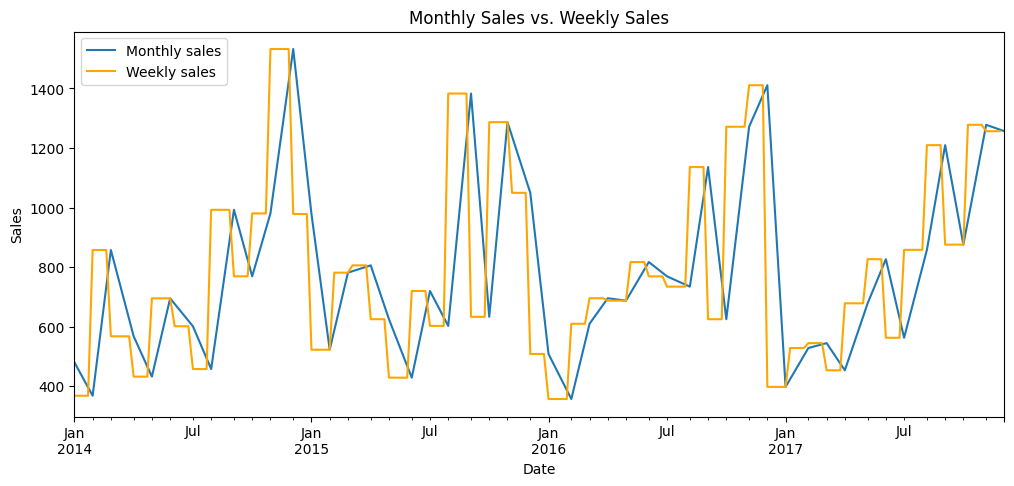

In [23]:
fig, ax = plt.subplots(figsize=(12, 5))
# Plot the down sampled
sales_sample_monthly['Sales'].plot(ax=ax, label='Monthly sales')
# Plot the upsampled data
sales_sample_weekly['Sales'].plot(ax=ax, label='Weekly sales', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Monthly Sales vs. Weekly Sales')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

Time shifting

In [24]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Uploading the file
from google.colab import files
uploaded = files.upload()

Saving Superstore_Sales_Records.xls to Superstore_Sales_Records (2).xls


In [26]:
# Loading into a data frame
sales = pd.read_excel("Superstore_Sales_Records.xls")
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [27]:
# Filtering furniture categories and sorting values
sales_furniture = sales[sales['Category']=='Furniture']
sales_furniture = sales_furniture.groupby(by='Order Date').agg({'Sales':sum})
sales_furniture.sort_index(inplace=True)
sales_furniture.head()

<ipython-input-27-2610858174>:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sales_furniture = sales_furniture.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [28]:
# Resample it on monthly level
sales_furniture = sales_furniture.resample('MS').mean()
sales_furniture.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


In [29]:
# Shift the time by period 1
sales_furniture['lag_1'] = sales_furniture.shift(periods=1)
sales_furniture.head()

,Sales,lag_1
Order Date,,
2014-01-01,480.194231,NaN
2014-02-01,367.931600,480.194231
2014-03-01,857.291529,367.931600
2014-04-01,567.488357,857.291529
2014-05-01,432.049188,567.488357


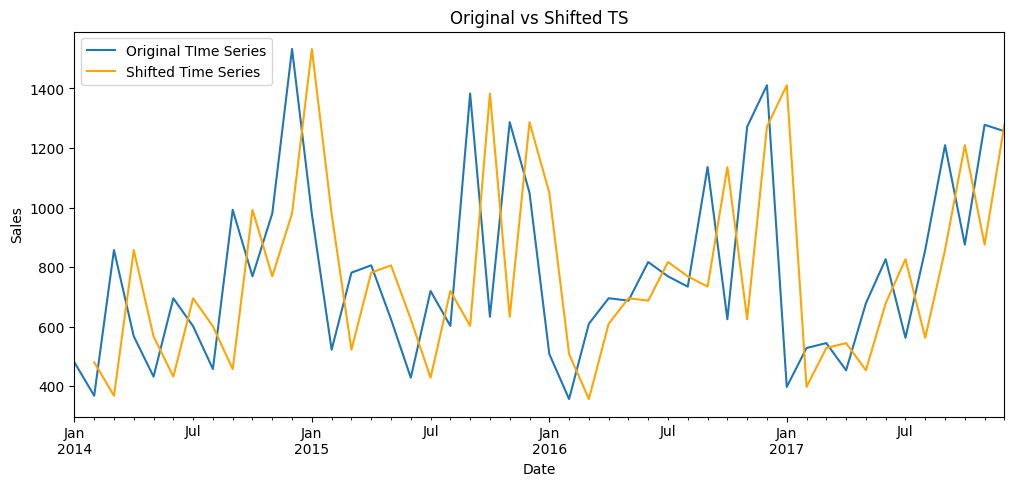

In [30]:
fig, ax = plt.subplots(figsize=(12, 5))
# Plot orig ts
sales_furniture['Sales'].plot(ax=ax, label='Original TIme Series')
# Plot the shifted ts
sales_furniture['lag_1'].plot(ax=ax, label='Shifted Time Series', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Original vs Shifted TS')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

In [31]:
sales_sample.tail()

,Sales
Order Date,
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568
2017-12-29,2330.7180
2017-12-30,323.1360


In [32]:
sales_sample.shift(periods=-1).tail()

,Sales
Order Date,
2017-12-24,832.4540
2017-12-25,551.2568
2017-12-28,2330.7180
2017-12-29,323.1360
2017-12-30,NaN


In [33]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Uploading the file
from google.colab import files
uploaded = files.upload()

Saving Superstore_Sales_Records.xls to Superstore_Sales_Records (3).xls


In [37]:
# Loading into a data frame
sales_data = pd.read_excel("Superstore_Sales_Records.xls", index_col='Order Date', parse_dates=True)
sales_data.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [38]:
# Noting the columns
sales_data.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [39]:
# Filtering furniture categories
sales_furniture = sales_data.query("Category=='Furniture'", )
sales_furniture.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [40]:
# Sort the data over Order Date
sales_furniture = sales_furniture.sort_index()
sales_furniture = sales_furniture[['Sales']]
sales_furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940


In [41]:
# Aggregate values over Order Date
sales_furniture = sales_furniture.groupby(by='Order Date').agg({'Sales':sum})
sales_furniture.head()

<ipython-input-41-4259419629>:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sales_furniture = sales_furniture.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


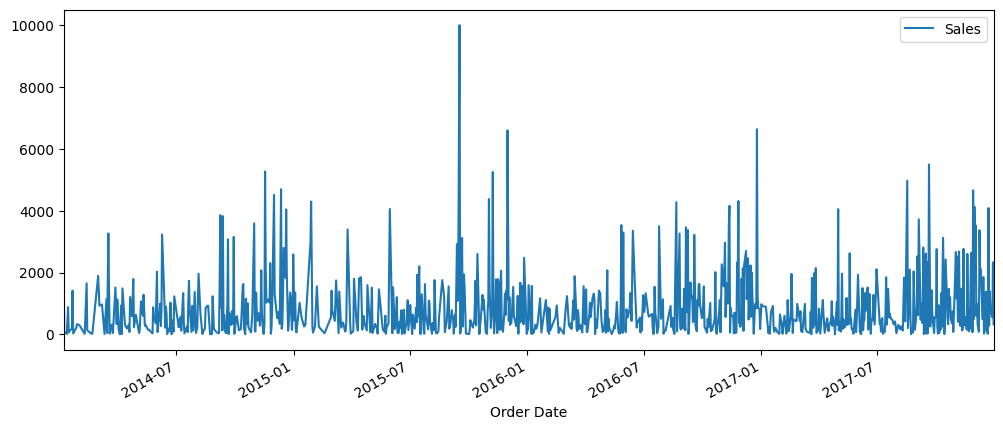

In [42]:
# Plotting the data orderly
sales_furniture.plot(figsize=(12, 5)).autoscale(axis='x', tight=True)

In [43]:
# Resample data over monthly basis
sales_furniture = sales_furniture.resample('MS').agg(sum)
sales_furniture.head()

<ipython-input-43-2348518923>:2: FutureWarning: The provided callable <built-in function sum> is currently using DatetimeIndexResampler.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sales_furniture = sales_furniture.resample('MS').agg(sum)


,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


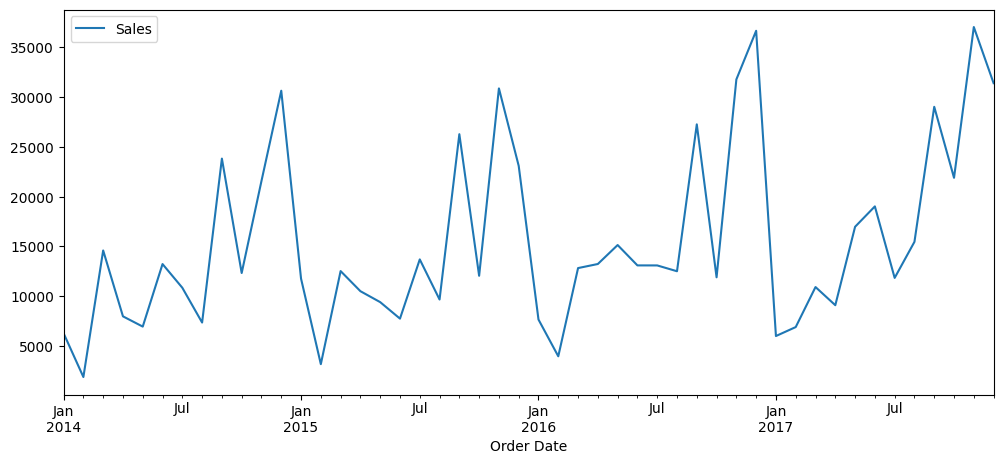

In [44]:
# Plotting monthly data
sales_furniture.plot(figsize=(12, 5)).autoscale(axis='x', tight=True)

In [45]:
# Calculating rolling mean
sales_furniture['Quaterly rolling mean'] = sales_furniture['Sales'].rolling(window=3).mean()
sales_furniture.head()

,Sales,Quaterly rolling mean
Order Date,,
2014-01-01,6242.525,NaN
2014-02-01,1839.658,NaN
2014-03-01,14573.956,7552.046333
2014-04-01,7944.837,8119.483667
2014-05-01,6912.787,9810.526667


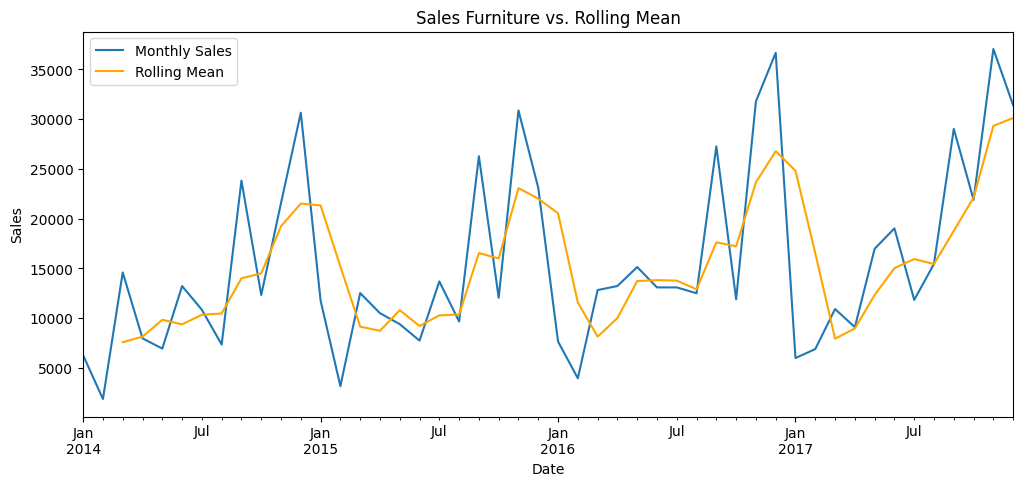

In [46]:
fig, ax = plt.subplots(figsize=(12, 5))
# Plot the sales_furniture data
sales_furniture['Sales'].plot(ax=ax, label='Monthly Sales')
# Plot the sales_furniture_rolling data
sales_furniture['Quaterly rolling mean'].plot(ax=ax, label='Rolling Mean', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Sales Furniture vs. Rolling Mean')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')
plt.show()

Expanding window

In [47]:
# Cummulative average sales
sales_furniture['Exapanding mean'] = sales_furniture['Sales'].expanding(min_periods=3).mean()

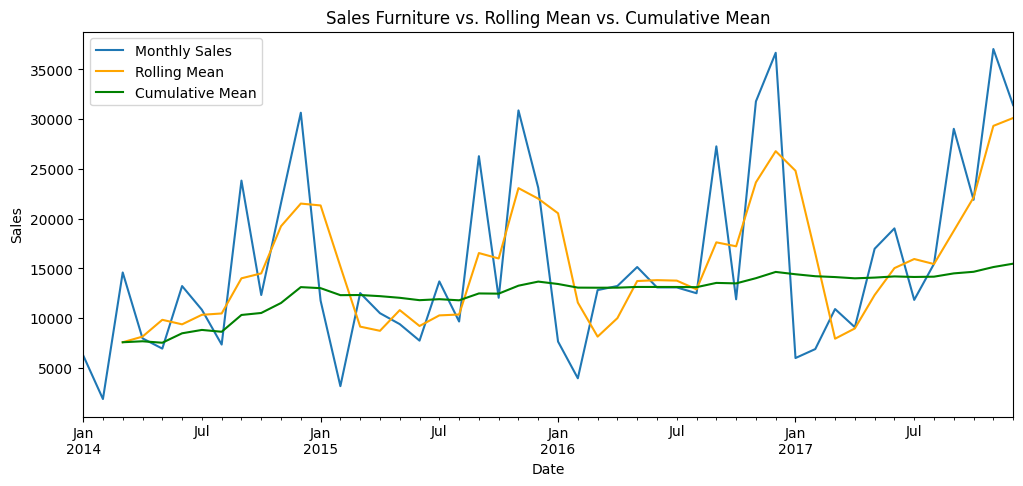

In [48]:
fig, ax = plt.subplots(figsize=(12, 5))
# Plot the sales_furniture data
sales_furniture['Sales'].plot(ax=ax, label='Monthly Sales')
# Plot the sales_furniture rolling mean
sales_furniture['Quaterly rolling mean'].plot(ax=ax, label='Rolling Mean', color='orange')
# Plot the sales_furniture cumulative mean
sales_furniture['Exapanding mean'].plot(ax=ax, label='Cumulative Mean', color='green')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Sales Furniture vs. Rolling Mean vs. Cumulative Mean')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')
plt.show()